<a href="https://colab.research.google.com/github/Harmokay/my-python-learning-journey/blob/main/Workshop_9_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
files =files.upload()

Saving Reviews.csv to Reviews (1).csv


In [3]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [5]:
df.dropna(inplace=True)

In [6]:
# Extracting a sample
df = df.sample(n=10000, random_state = 48)
df.reset_index(drop=True, inplace=True)

In [7]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,269423,B000P41A46,A1QDWZZK6D84KJ,Brittnie N.,0,0,4,1315440000,Works great for spit up,Works great for spit up but does cause constip...
1,420706,B0016BU8PE,ARDTROQ8M2972,A. Bartlett,3,3,5,1318896000,Ghiradelli Chocolate Chip Cookie Mix,Quick and easy to make these are better than h...
2,198167,B001EO6B3G,A384L2XYMN68QZ,"Angela Eck ""Angela""",0,0,3,1291420800,"Like the oil, but dislike the packaging.",I love using this grapeseed oil in my cooking ...
3,455585,B005HG9ERW,#oc-R12MGTQS5KZZRV,"SKY2110 ""SKY2110""",0,1,5,1344211200,Highest PH level we can find without buying a ...,This is the highest PH level I can find withou...
4,301886,B006MW5DGG,AEE1DL0IVKYKZ,LvnLife520,2,2,5,1339718400,ugogrl520,"I was very pleased with the taste of these ""Gl..."
...,...,...,...,...,...,...,...,...,...,...
9995,262311,B002CZLOIS,A2DZ8D42JIFK4T,makeup maven,0,0,4,1343952000,Good price in store and good treats...,I almost didn't buy these because they are mad...
9996,112389,B001GQ3E2I,A1CAN6KVCSV9JR,Tiff T,0,0,5,1346371200,Delicious,I love this peanut butter! It does have sugar...
9997,10945,B000EM6PC6,A2EC7QA31CFK4V,P. Tubb,0,0,5,1217030400,Satisfied customer,This is my third order of Lipton loose Tea. I...
9998,348759,B005IYFRUQ,A2VVXTDQ5RNB33,S. Mercado,16,16,5,1326931200,The best option yet for our Keurig Brewers!,Just bought a few of these along with the pape...


In [8]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
%matplotlib notebook
# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show(renderer="colab")


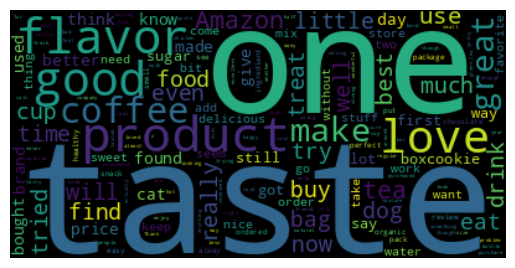

In [9]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

In [10]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

/tmp/ipython-input-1554295975.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,269423,B000P41A46,A1QDWZZK6D84KJ,Brittnie N.,0,0,4,1315440000,Works great for spit up,Works great for spit up but does cause constip...,1
1,420706,B0016BU8PE,ARDTROQ8M2972,A. Bartlett,3,3,5,1318896000,Ghiradelli Chocolate Chip Cookie Mix,Quick and easy to make these are better than h...,1
3,455585,B005HG9ERW,#oc-R12MGTQS5KZZRV,"SKY2110 ""SKY2110""",0,1,5,1344211200,Highest PH level we can find without buying a ...,This is the highest PH level I can find withou...,1
4,301886,B006MW5DGG,AEE1DL0IVKYKZ,LvnLife520,2,2,5,1339718400,ugogrl520,"I was very pleased with the taste of these ""Gl...",1
5,523784,B0062MZU3W,AQHGABWEEHR05,"K. Fay ""Lost in minnesota""",2,2,5,1285632000,I won't eat salmon without this!,"This stuff is amazing! Even my mom, who doesn'...",1
...,...,...,...,...,...,...,...,...,...,...,...
9995,262311,B002CZLOIS,A2DZ8D42JIFK4T,makeup maven,0,0,4,1343952000,Good price in store and good treats...,I almost didn't buy these because they are mad...,1
9996,112389,B001GQ3E2I,A1CAN6KVCSV9JR,Tiff T,0,0,5,1346371200,Delicious,I love this peanut butter! It does have sugar...,1
9997,10945,B000EM6PC6,A2EC7QA31CFK4V,P. Tubb,0,0,5,1217030400,Satisfied customer,This is my third order of Lipton loose Tea. I...,1
9998,348759,B005IYFRUQ,A2VVXTDQ5RNB33,S. Mercado,16,16,5,1326931200,The best option yet for our Keurig Brewers!,Just bought a few of these along with the pape...,1


In [12]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

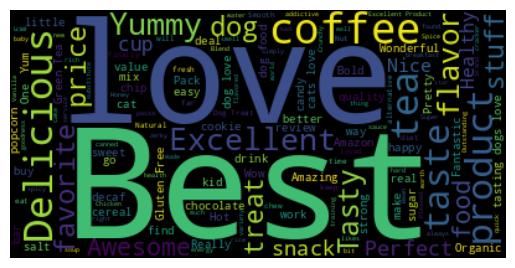

In [13]:
# Word cloud positive
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"])
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

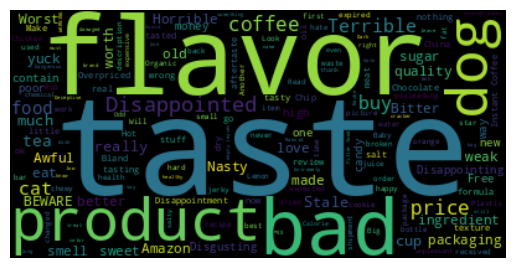

In [14]:
# word cloud negative

neg = " ".join(str(review) for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [15]:
# review distribution
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show(renderer="colab")

/tmp/ipython-input-3162673783.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3162673783.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
# removing punctuation method 1
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

/tmp/ipython-input-3218244217.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
# Removing punctuation method 2
import string
string.punctuation
df['Text']=df['Text'].apply(lambda x:''.join(i for i in x if i not in string.punctuation))
df['Summary']=df['Summary'].apply(lambda x:''.join(i for i in x if i not in string.punctuation))

In [18]:
# Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
df['Text']=df.Text.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))
df['Summary']=df.Summary.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Extracting input and output
X=df['Summary']
# X=df['Text']
y=df['sentiment']

In [20]:
X

,Summary
0,Works great spit
1,Ghiradelli Chocolate Chip Cookie Mix
3,Highest PH level find without buying home system
4,ugogrl520
5,I wont eat salmon without
...,...
9995,Good price store good treats
9996,Delicious
9997,Satisfied customer
9998,The best option yet Keurig Brewers


In [21]:
y

,sentiment
0,1
1,1
3,1
4,1
5,1
...,...
9995,1
9996,1
9997,1
9998,1


In [22]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(X)

In [23]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 29012 stored elements and shape (9231, 5105)>

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)

(6184, 5105)
(3047, 5105)


In [26]:
# Step 1: defining the classification models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()
NB = GaussianNB()
LR = LogisticRegression()

In [27]:
# Step 2: training the models
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train,y_train)
NB.fit(X_train.toarray(),y_train)

GaussianNB()

In [28]:
#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test.toarray())

In [29]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

Text(0.5, 1.0, 'NB')

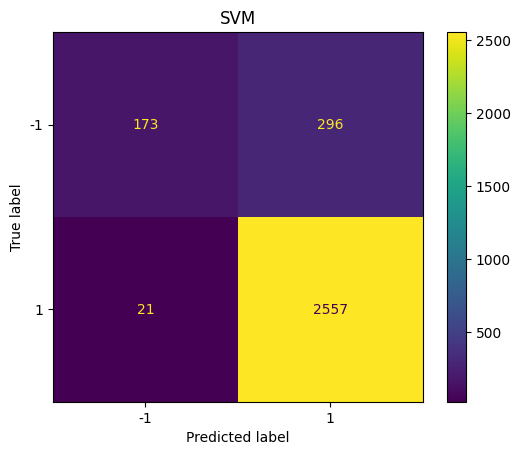

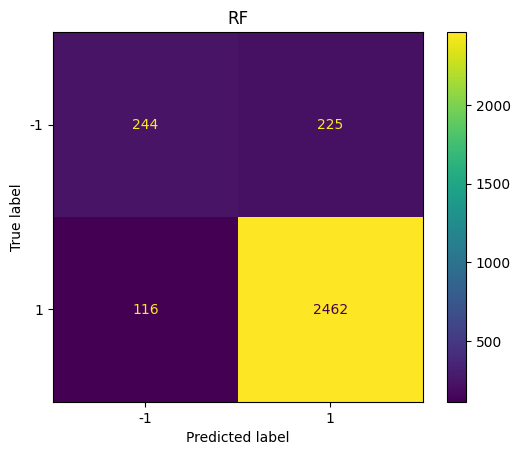

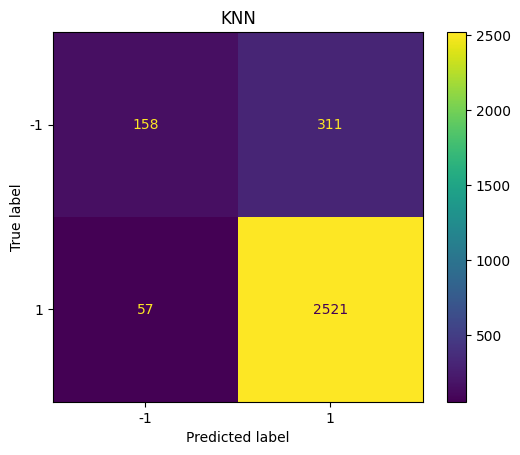

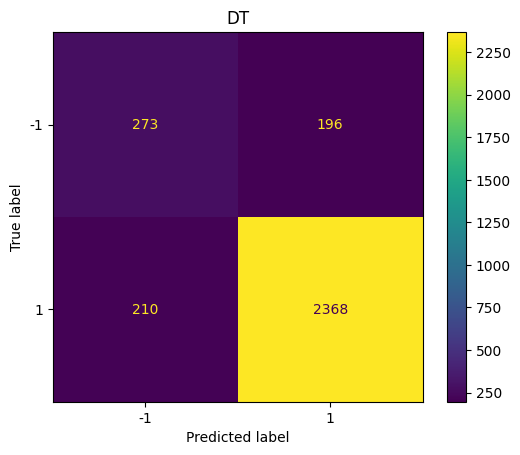

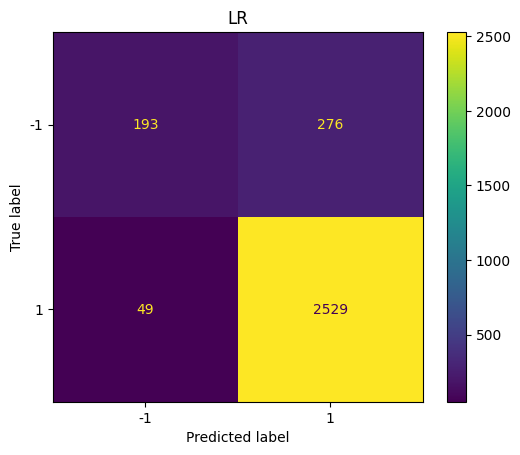

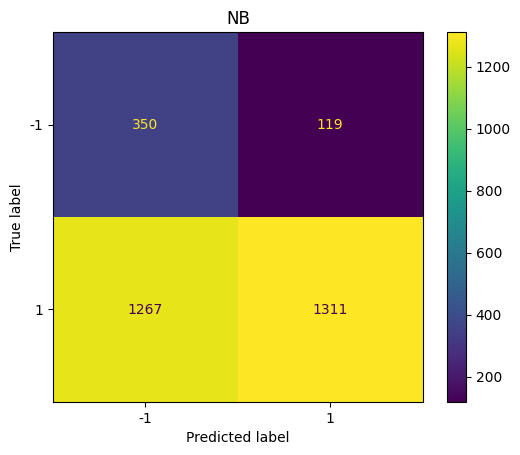

In [30]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")

cm5 = confusion_matrix(y_test, y_pred5, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=DT.classes_)
disp.plot()
plt.title("LR")

cm6 = confusion_matrix(y_test, y_pred6, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=DT.classes_)
disp.plot()
plt.title("NB")

In [31]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')
print('LR metrics\n')
confusion_metrics(cm5)
print('\n\n')
print('NB metrics\n')
confusion_metrics(cm6)
print('\n\n')

SVM metrics

True Positives: 2557
True Negatives: 173
False Positives: 296
False Negatives: 21
--------------------------------------------------
Accuracy: 0.9
Mis-Classification: 0.1
Sensitivity: 0.99
Specificity: 0.37
Precision: 0.37
f_1 Score: 0.54



RF metrics

True Positives: 2462
True Negatives: 244
False Positives: 225
False Negatives: 116
--------------------------------------------------
Accuracy: 0.89
Mis-Classification: 0.11
Sensitivity: 0.96
Specificity: 0.52
Precision: 0.52
f_1 Score: 0.67



KNN metrics

True Positives: 2521
True Negatives: 158
False Positives: 311
False Negatives: 57
--------------------------------------------------
Accuracy: 0.88
Mis-Classification: 0.12
Sensitivity: 0.98
Specificity: 0.34
Precision: 0.34
f_1 Score: 0.5



DT metrics

True Positives: 2368
True Negatives: 273
False Positives: 196
False Negatives: 210
--------------------------------------------------
Accuracy: 0.87
Mis-Classification: 0.13
Sensitivity: 0.92
Specificity: 0.58
Precision: